## Specialized Semismooth Newton Method for Kernel-Based Optimal Transport

### DISCLAIMER : The current code does not work as intended in every scenario, further improvement should be made for it to be implemented in the toolbox.

This notebook serves as an example of implementation of $\textbf{A Specialized Semismooth Newton Method for Kernel-Based Optimal Transport}$ by Tianyi Lin and Marco Cuturi and Michael I. Jordan (https://doi.org/10.48550/arXiv.2310.14087).

### Reminders on Kernel-Based OT

Let $X$ and $Y$ be two bounded domains in $\mathbb{R}^d$, and let $\mathcal{P}(X)$ and $\mathcal{P}(X)$ be the set of probability measures on $X$ and $Y$. Let $\mu \in \mathcal{P}(X)$ and $\nu \in \mathcal{P}(X)$ and $\Pi(\mu,\nu)$ the set of couplings between $\mu$ and $\nu$.
The primal OT problem is defined as :
\begin{align*}
OT(\mu,\nu) := \frac{1}{2} \left( \underset{\pi \in \Pi(\mu,\nu)}{\inf} \int_{X\times Y} \lVert x-y \rVert^2 d\pi(x,y) \right)
\end{align*}
and the associated dual problem is:
\begin{align*}
\underset{u,v \in C^0(\mathbb{R}^d)}{\sup} \int_X u(x)d\mu(x) + \int_Y v(y) d\nu(y), \text{ such that } \frac{1}{2} \lVert x-y \rVert^2 \geq u(x) + v(y) , \forall (x,y) \in X\times Y
\end{align*}

If we assume finiteness and a certain degree of smoothness for the densities of $\mu$ and $\nu$, along with the convexity of $X$ and $Y$ and some other properties, we can define $H^s(Z) := \{f \in L^2(Z) | \lVert f \rVert_{H^s(Z)} := \sum_{|\alpha|\leq s}\lVert D^\alpha f \rVert_{L^2(Z)} < +\infty  \}$, and see that $\forall s > \frac{d}{2} + k,H^s(Z) \subset C^k(Z)$. 
With the previous assumptions, we get that $H^{m+1}(X), H^{m+1}(Y)$ and $H^m(X \times Y)$ are RKHS, with associated feature maps $\phi_X, \phi_Y$ and $\phi_{XY}$.

Under these assumptions, the dual problem now can be rewritten:
\begin{align*}
&\underset{u,v,A}{\max} \langle u, w_\mu \rangle_{H_X} + \langle v, w_\nu \rangle_{H_Y}\\
& \text{s.t.} \frac{1}{2} \lVert x-y \rVert^2 -u(x)-v(y) = \langle \phi_{XY}(x,y), A\phi_{XY}(x,y) \rangle_{H_{XY}}
\end{align*}
This reformulation presents the advantage of (i) having a neat approximation of the equality constraint and (ii) allowing the kernel trick since we are working with RKHS.
This problem can now be approximated by using the data $(x_i,y_i)_{i=1}^{n_{sample}} \sim \mu\times\nu $ and sampling filling points $(\tilde{x_i},\tilde{y_i})_{i=1}^n \subset X\times Y$. We can then define the empirical measures $\tilde{\mu}$ and $\tilde{\nu}$ as usually done and the corresponding empirical $\textit{kernel mean embeddings } w_{\tilde{\mu}} = \frac{1}{n_{sample}} \sum_{i=1}^{n_{sample}} \phi_X(x_i)$ and $w_{\tilde{\nu}}$.
However, this methods induces some error due to sampling, which can be reduced by regularization as follows:
\begin{align*}
&\underset{u,v,A}{\max} \langle u, w_\mu \rangle_{H_X} + \langle v, w_\nu \rangle_{H_Y} - \lambda_1 \text{Tr}(A) - \lambda_2(\lVert u \rVert^2_{H_X} + \lVert v \rVert^2_{H_Y})\\
& \text{s.t.} \frac{1}{2} \lVert \tilde{x_i}-\tilde{y_i} \rVert^2 -u(\tilde{x_i})-v(\tilde{y_i}) = \langle \phi_{XY}(\tilde{x_i},\tilde{y_i}), A\phi_{XY}(\tilde{x_i},\tilde{y_i}) \rangle_{H_{XY}}
\end{align*}
Defining $\hat{u}_*$ and $\hat{v}_*$ as the only minimizers of this problem, we obtain the estimator :
\begin{align*}
\hat{OT}^n = \langle \hat{u}_*, w_{\tilde{\mu}} \rangle_{H_X} + \langle \hat{v}_*, w_{\tilde{\nu}} \rangle_{H_Y}
\end{align*}

The issue of this formulation is that it is extremely hard to solve. However, we can present it as a finite-dimensional problem, for which strong duality holds true.
We define $Q\in \mathbb{R}^{n\times n}$ with $Q_{ij} = k_X(\tilde{x_i},\tilde{x_j}) + k_Y(\tilde{y_i},\tilde{y_j}), z\in \mathbb{R}^n$ with $z_i = w_{\tilde{\mu}}(\tilde{x_i}) + w_{\tilde{\nu}}(\tilde{y_i}) - \lambda_2 \lVert \tilde{x_i}-\tilde{y_i} \rVert^2$, and $q^2 = \lVert w_{\tilde{\mu}} \rVert_{H_X}^2 + \lVert w_{\tilde{\nu}} \rVert_{H_Y}^2$. If we note $N = n_{sample}$, we have the following :
\begin{align*}
w_{\tilde{\mu}}(\tilde{x_i}) &= \frac{1}{N} \sum_{j=1}^N k_X(x_j,\tilde{x_i}) \\
w_{\tilde{\nu}}(\tilde{y_i}) &= \frac{1}{N} \sum_{j=1}^N k_Y(y_j,\tilde{y_i})\\
\lVert w_{\tilde{\mu}} \rVert_{H_X}^2 &= \frac{1}{N^2} \sum_{1\leq i,j\leq N}^N k_X(x_i,x_j)\\
\lVert w_{\tilde{\nu}} \rVert_{H_Y}^2 &= \frac{1}{N^2} \sum_{1\leq i,j\leq N}^N k_Y(y_i,y_j)\\
\end{align*}

Now, we can define $K \in \mathbb{R}^{n\times n}$ by $K_{ij} = k_{XY}((\tilde{x_i},\tilde{y_i}),(\tilde{x_j},\tilde{y_j}))$, and $R$ as the upper triangular matrix for the Cholesky decomposition of $K$, whose columns are denoted $\Phi_i$.

We can now rewrite the dual OT problem again, as:
\begin{align*}
&\underset{\gamma \in \mathbb{R}^n}{\min} \frac{1}{4\lambda_2} \gamma^T Q \gamma - \frac{1}{2\lambda_2} \gamma^T z + \frac{q^2}{4\lambda_2} \\
&\text{s.t. } \sum_{i=1}^n \gamma_i \Phi_i \Phi_i^T + \lambda_1 I \succeq 0 
\end{align*}

Denoting $\hat{\gamma}$ a minimizer, we obtain our estimator :
\begin{align*}
\hat{OT}^n = \frac{q^2}{2\lambda_2} - \frac{1}{2\lambda_2} \sum_{i=1}^n \hat{\gamma}_i(w_{\tilde{\mu}}(\tilde{x_i}) + w_{\tilde{\nu}}(\tilde{y_i}))
\end{align*}

### Methods and implementations

Defining the operator $\Phi : \mathbb{R}^{n\times n} \mapsto \mathbb{R}^n$ by $\Phi(X) = (\langle X, \Phi_i \Phi_i^T \rangle)_{i=1}^n$, we can also define its adjoint $\Phi^* : \mathbb{R}^{n} \mapsto \mathbb{R}^{n\times n}$ by $\Phi^*(\gamma) = \sum_{i=1}^n \gamma_i \Phi_i \Phi_i^T$.
This allows to reformulate the previous problem as follows :
\begin{align*}
\underset{\gamma \in \mathbb{R}^n}{\min} \underset{X\in \mathcal{S}^n_{+}}{\min} \frac{1}{4\lambda_2} \gamma^T Q \gamma - \frac{1}{2\lambda_2} \gamma^T z + \frac{q^2}{4\lambda_2} - \langle X, \Phi^*(\gamma) + \lambda_1 I \rangle
\end{align*}
where $\mathcal{S}^n_{+}$ is the set of symmetric positive matrices.
We now denote $w = (\gamma, X)$ a vector-matrix pair, and we define :
\begin{align*}
R(w) = \begin{pmatrix} \frac{1}{2\lambda_2}Q\gamma - \frac{1}{2\lambda_2}\gamma^Tz - \Phi(X) \\ X - \text{proj}_{\mathcal{S}^n_{+}}(X - (\Phi^*(\gamma) + \lambda_1I)) \end{pmatrix}
\end{align*}

To get an optimal solution of the OT problem, we will look for a couple $\hat{w} = (\hat{\gamma}, \hat{X})$ such that $R(\hat{w}) = 0$. However, the previous problem is nonsmooth, therefore we will use $R$ to try and get a semismooth solution. 

#### Imports

In [1]:
import sys

if "google.colab" in sys.modules:
    !pip install -q git+https://github.com/ott-jax/ott@main

In [2]:
import jax.numpy as jnp
import jax

from scipy.stats.qmc import Sobol
from jax import random
from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt

import time

#### Hyperparameters specification

In [3]:
alpha1 = 1e-6
alpha2 = 1.0
beta0 = 0.5
beta1 = 1.2
beta2 = 5
bandwidth = 0.005
d = 1
n = 50
n_samples = 50
lambda1 = 1/n
lambda2 = 1/jnp.sqrt(n_samples)
theta_down = 1e-6
theta_up = 1e6
tau = 0.005

### Sampling of source and target distributions

Utilitary function to compute norm of $\lVert w \rVert = \lVert \gamma \rVert_2 + \lVert X \rVert_F$ :

In [4]:
@jax.jit
def custom_norm(w):
    return jnp.linalg.norm(w[0]) + jnp.sqrt(jnp.sum(w[1]**2))

First, we need to define functions that can generate the data and filling points. The source distribution follows a mixture of 3 $d$-dimensional Gaussians, and the target distribution follows a mixture of 5 $d$-dimensional Gaussians. The filling points are generated following a $2d$ Sobol sequence.

In [5]:
def get_filling_points(d=d, n_samples=n_samples):
    sobol = Sobol(2*d, scramble=True)
    sobol = jnp.array(sobol.random(n_samples))
    if d == 1:
        sobol = jnp.insert(sobol, 0, jnp.array([1e-2, 1e-2]))
        sobol = jnp.insert(sobol, 0, jnp.array([1-1e-2, 1-1e-2]))
        sobol = jnp.insert(sobol, 0, jnp.array([1e-2, 1-1e-2]))
        sobol = jnp.insert(sobol, 0, jnp.array([1.-1e-2, 1e-2]))
        sobol = sobol.reshape(-1, 2*d)[:-4 , :]
    return sobol

def get_data(d=d, n_samples=n_samples):
    rng = random.PRNGKey(0)

    # Sample means and covariances for x and y
    means_x = random.uniform(rng, (3, d), minval=0.2, maxval=0.8)
    covariances_x = jnp.stack([0.075 * jnp.eye(d)]*3)
    weights_x = jnp.array([0.1, 0.6, 0.3])

    means_y = random.uniform(rng, (5, d), minval=0.2, maxval=0.8)
    covariances_y = jnp.stack([0.075 * jnp.eye(d)]*5)
    weights_y = jnp.array([0.1, 0.2, 0.1, 0.2, 0.4])
    # Sample x and y in one go using vectorized multivariate_normal
    X = jnp.sum((random.multivariate_normal(rng, means_x, covariances_x, shape=(n_samples, 3))*weights_x[:, jnp.newaxis]), axis=1)
    Y = jnp.sum((random.multivariate_normal(rng, means_y, covariances_y, shape=(n_samples, 5))*weights_y[:, jnp.newaxis]), axis=1)

    X = jnp.clip(X, 0, 1)
    Y = jnp.clip(Y, 0, 1)

    if d==1:
        x = jnp.linspace(0, 1, 2000)
        
        r_tmp = []    
        for mode in means_x:
            r_tmp.append(norm.pdf(x,mode, 0.075))
                
        c_tmp = []
        for mode in means_y:
            c_tmp.append(norm.pdf(x,mode, 0.075))
        
        mu = jnp.dot(weights_x,jnp.array(r_tmp))
        nu = jnp.dot(weights_y,jnp.array(c_tmp))

        return X, Y, mu, nu
    else:
        return X, Y

In [6]:
if d==1:
    x,y, mu, nu = get_data()
else:
    x, y = get_data()

filling_points = get_filling_points()
x_fill, y_fill = filling_points[:,:d], filling_points[:,d:]

c:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


We can plot our data points if they are 1D, which is the case in the provided example, do not run if you changed $d$. We also show the filling points.

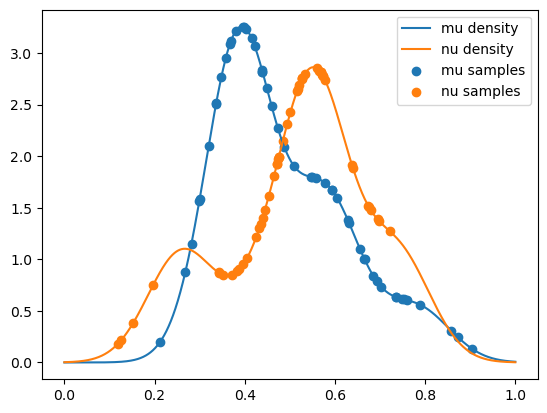

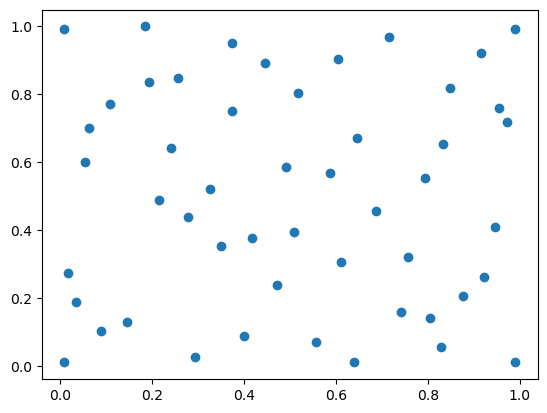

In [7]:
T = np.linspace(0, 1, 2000)

fig, ax = plt.subplots()

ax.plot(T, mu, label = 'mu density')
ax.plot(T, nu, label = 'nu density')

ax.scatter(x, mu[(2000 * x).astype(int)], label = 'mu samples')
ax.scatter(y, nu[np.minimum((2000 * y).astype(int), 2000-1)], label = 'nu samples')

plt.legend()
plt.show()

plt.scatter(x_fill, y_fill)
plt.show()

### Implementation of functions for the SSN algorithm

We define a function that returns the Gaussian kernel matrix for two sets of points : $k(x,y) = \exp\left(-\frac{(x-y)^2}{2 \sigma^2}\right)$

In [8]:
@jax.jit
def kernel(x1,x2, bandwidth):
    x1 = x1[..., None]
    x2 = x2[..., None]
    squared_diffs = jnp.sum((x1 - x2.T)**2, axis=1)
    return jnp.exp(-squared_diffs/(2*bandwidth))

We need to $R, Q, z, w_{\hat{\mu}}, w_{\hat{\nu}}$ and $q^2$ as defined in the method presentation :

In [9]:
@jax.jit
def get_QRzq2w_hat(x, y, filling_points, lambda_2, bandwidth):
    n_sample = filling_points.shape[0]
    d = int(filling_points.shape[1]/2)
    x_tilde, y_tilde = filling_points[:,:d], filling_points[:,d:]

    Kx1 = kernel(x_tilde, x_tilde, bandwidth)
    Ky1 = kernel(y_tilde, y_tilde, bandwidth)

    Kx2 = kernel(x, x_tilde, bandwidth)
    Ky2 = kernel(y, y_tilde, bandwidth)

    Kx3 = kernel(x, x, bandwidth)
    Ky3 = kernel(y, y, bandwidth)

    K = kernel(filling_points, filling_points, bandwidth)
    
    Q = Kx1 + Ky1
    R = jnp.linalg.cholesky(K, upper=True)

    w_mu_hat = 1/n_sample * jnp.sum(Kx3, axis=0)
    w_nu_hat = 1/n_sample * jnp.sum(Ky3, axis=0)
    z = w_mu_hat + w_nu_hat - lambda_2*(jnp.linalg.norm(x_tilde - y_tilde, axis=1)**2)
    q2 = 1/n_sample**2 * (jnp.sum(Kx2) + jnp.sum(Ky2))

    return Q, R, z, q2, w_mu_hat, w_nu_hat

Then, we will implement the operators $\Phi$ and $\Phi^*$ and the function that allows to project a matrix on $\mathcal{S}^n_+$. For $Z \in \mathcal{M}_n(\mathbb{R})$, we denote $\alpha = \{i | \sigma_i > 0\}$, and $\bar{\alpha} = \{1,...,n\} \setminus \alpha$, the sets of indices of positive and nonpositive eigenvalues of $Z$ respectively. We know that we can write $Z = P \Sigma P^T$, with $\Sigma = \text{diag}(\sigma_1,...,\sigma_n) = \begin{pmatrix} \Sigma_\alpha & 0 \\ 0 & \Sigma_{\bar{\alpha}} \end{pmatrix}$ and $P = \begin{pmatrix} P_\alpha & P_{\bar{\alpha}} \end{pmatrix}$. 
Therefore, we have $\text{proj}_{\mathcal{S}^n_+}(Z) = P_\alpha \Sigma_\alpha P_\alpha^T$.

In [10]:
@jax.jit
def phi(A, X):
    n = X.shape[0]
    return jnp.matmul(A, jnp.ravel(X))
    

@jax.jit
def phi_star(A, gamma):
    return jnp.matmul(A.T, gamma).reshape((n,n))

# This function does not directly return the projection, but rather the different elements required to obtain it. 
# The algorithm needs alpha and alpha_bar at some point, so we return them as well 
@jax.jit
def project(Z):
    eigenvals, P = jnp.linalg.eig(Z)
    alpha = jnp.where(eigenvals>=0,1,0)
    alpha_bar = jnp.where(eigenvals<0,1,0)

    eigenvals = jnp.real(eigenvals)
    P = jnp.real(P)
    return P, eigenvals, alpha, alpha_bar

Then we need a function to compute $R(w)$ and the gradient of the function we look to max/min, which will be used in the EG algorithm :
\begin{align*}
R(w) &= \begin{pmatrix} \frac{1}{2\lambda_2}Q\gamma - \frac{1}{2\lambda_2}\gamma^Tz - \Phi(X) \\ X - \text{proj}_{\mathcal{S}^n_{+}}(X - (\Phi^*(\gamma) + \lambda_1I)) \end{pmatrix}\\
f(w) = \nabla F(w) &= \begin{pmatrix} \frac{1}{2\lambda_2}Q\gamma - \frac{1}{2\lambda_2}\gamma^Tz - \Phi(X) \\  - \Phi^*(\gamma) - \lambda_1I \end{pmatrix}
\end{align*}

In [11]:
@jax.jit
def R_w(A, w, Q, z, lambda1, lambda2):
    gamma, X = w
    n = gamma.shape[0]
    Z = X - phi_star(A, gamma) - lambda1*jnp.eye(n)
    P, eigenvals, alpha, alpha_bar = project(Z)

    eigenvals = jnp.maximum(0, eigenvals)

    r1 = 1/(2*lambda2) * (jnp.matmul(Q, gamma) - z) - phi(A, X)
    r2 = X - jnp.matmul(P, jnp.matmul(jnp.diag(eigenvals), P.T))
    
    return (r1, r2)

# Gradient of the function to min/max
@jax.jit
def f(A, w, Q, z, lambda1, lambda2):
    gamma, X = w
    n = gamma.shape[0]
    f1 = 1/(2*lambda2) * (jnp.matmul(Q, gamma) - z) - phi(A, X)
    f2 = -phi_star(A, gamma) - lambda1*jnp.eye(n)
    return (f1, f2)

Then, we will have to implement a function that updates $v_k$ using the one-step extragradient (EG) method, which we recall is defined by the following update of $v_k = (\gamma_k, X_k)$ in our case:

$$\begin{align*}
\gamma_{k+\frac{1}{2}} &= \gamma_k - \varepsilon \nabla_\gamma F(v_k) \\
X_{k+\frac{1}{2}} &= \mathcal{P}_{\mathcal{S}^n_+}(X_k + \varepsilon \nabla_X F(v_k)) \\
\gamma_{k+1} &= \gamma_k - \varepsilon \nabla_\gamma F(v_{k+\frac{1}{2}}) \\
X_{k+1} &= \mathcal{P}_{\mathcal{S}^n_+}(X_k + \varepsilon \nabla_X F(v_{k+\frac{1}{2}})) \\
\end{align*}$$
where $\mathcal{P}_{\mathcal{S}^n_+}$ is the projection onto symmetric positive matrices, and $v_{k+\frac{1}{2}} = (\gamma_{k+\frac{1}{2}}, X_{k+\frac{1}{2}})$.

In [12]:
@jax.jit
def extragradient(A, w, Q, z, lambda1, lambda2):
    epsilon = d*0.01/(n_samples/50)
    # Intermediary step of update + projection
    r1, r2 = f(A, w, Q, z, lambda1, lambda2)
    P, eigenvals, alpha, alpha_bar = project(w[1] + epsilon*r2)

    eigenvals = jnp.maximum(0, eigenvals)

    w_inter = (w[0] - epsilon*r1, jnp.matmul(P, jnp.matmul(jnp.diag(eigenvals), P.T)))

    # Final step
    r1, r2 = f(A, w_inter, Q, z, lambda1, lambda2)
    P, eigenvals, alpha, alpha_bar = project(w[1] + epsilon*r2)

    eigenvals = jnp.maximum(0, eigenvals)
    
    w_final = (w[0] - epsilon*r1, jnp.matmul(P, jnp.matmul(jnp.diag(eigenvals), P.T)))
    return w_final


Then we need a function to compute $\mathcal{T}_k$ using the Zhao trick :
\begin{align*}
\mathcal{T}_k[S] = \begin{cases}
G + G^T, G = P_k(:, \alpha_k) \left( \frac{1}{2\mu_k} (U P_k(:, \alpha_k)) P_k(:, \alpha_k)^T + \xi_{\alpha_k \bar{\alpha_k}} \circ (U P_k(:, \bar{\alpha_k})) P_k(:, \bar{\alpha_k})^T\right) &if |\alpha_k| < |\bar{\alpha}_k|\\
 \frac{1}{\mu_k} S - P_k((\frac{1}{\mu_k} E - \Psi_k) \circ (P_k^T S P_k))P_k^T, &if |\alpha_k| > |\bar{\alpha}_k|
\end{cases}
\end{align*}

In [13]:
@jax.jit
def T_k(alpha, alpha_bar, S, P, mu, ksi):
    n = alpha.shape[0]
    E_alpha = (jnp.ones((n,n))*alpha).T * alpha
    psi = E_alpha/mu + ksi + ksi.T
    condition = jnp.sum(alpha) > jnp.sum(alpha_bar)
    P1 = P*alpha 
    P2 = P*alpha_bar
    U = jnp.matmul(P1.T,S)
    inter = jnp.matmul(ksi*jnp.matmul(U,P2),P2.T)
    G = jnp.matmul(P1,1/(2*mu)*jnp.matmul(jnp.matmul(U,P1),P1.T) + inter)
    result = jax.lax.cond(condition,
                          lambda : 1/mu * S - jnp.matmul(P, jnp.matmul((1/mu*jnp.ones_like(psi) - psi)*jnp.matmul(P.T, jnp.matmul(S,P)), P.T)),
                          lambda : G + G.T)
    return result

Function to retrieve $\Delta w_k$ using all the previously defined functions. We define $r_k^1, r_k^2 = R(w_k)$, 
\begin{align*}
a^{1}&=-r_{k}^{1}-\frac{1}{\mu_{k}+1}\Phi(r_{k}^{2}+\mathcal{T}_{k}[r_{k}^{2}]), \\
a^{2}&=-r_{k}^{2} \\
\tilde{a}^1 &= \left(\frac{1}{2\lambda_2}\mathcal{Q} + \mu_k \mathcal{I} + \Phi \mathcal{T}_k \Phi^* \right)^{-1}a^1 \\
\tilde{a}^2 &= \frac{1}{\mu_{k}+1}(a^{2}+\mathcal{T}_{k}[a^{2}]) \\
\Delta w_k^1 &= \tilde{a}^1 \\
\Delta w_k^2 &= \tilde{a}^2 - \mathcal{T}_k[\Phi^*(\tilde{a}^1)]
\end{align*}

In [14]:
@jax.jit
def get_delta_w(A, Q, z, w, lambda1, lambda2, theta):
    # Fixing parameters to improve readability
    gamma, X = w
    n = gamma.shape[0]
    I = jnp.eye(n)
    Z = X - (phi_star(A, gamma) + lambda1*I)
    # Projection of Z to retrieve alpha, P and sigma
    P, eigenvals, alpha, alpha_bar = project(Z)
    # Current r_k
    r1, r2 = R_w(A, w, Q, z, lambda1, lambda2)

    differences = eigenvals[None, :] - eigenvals[:, None]
    stacked_sigma = jnp.stack([eigenvals]*n)
    eta = jnp.where(differences!=0, stacked_sigma/differences, 0)
    eta = ((eta*alpha_bar).T * alpha).T # We do this to keep only the coefficients corresponding to alpha x alpha_bar

    mu = theta * custom_norm((r1,r2))

    # Application of Zhao trick to retrieve a and then delta w_k
    ksi = eta/(mu + 1 - eta)
    a1 = -r1 - 1/(mu+1) * phi(A, r2 + T_k(alpha, alpha_bar, r2, P, mu, ksi))
    a2 = -r2

    # Operator for the conjugate gradient step
    operator = lambda x : (1/(2*lambda2)*Q + mu*I) @ x + A @ T_k(alpha, alpha_bar, phi_star(A, x), P, mu, ksi).flatten()
    a1_tilde = jax.scipy.sparse.linalg.cg(operator, a1)[0]
    a2_tilde = 1/(mu+1)* (a2 + T_k(alpha, alpha_bar, a2, P, mu, ksi))

    return (a1_tilde, a2_tilde - T_k(alpha, alpha_bar, phi_star(A, a1_tilde), P, mu, ksi))

Function to update $\theta_k$, following the algorithm:
\begin{align*}
\theta_{k+1} &= \begin{cases}
\max(\underline{\theta}, \beta_0 \theta_k), &\text{if } \rho_k \geq \alpha_2 \lVert \Delta w_k \rVert^2, \\
\beta_1 \theta_k, &\text{if } \alpha_1 \lVert \Delta w_k \rVert^2 \leq \rho_k < \alpha_2 \lVert \Delta w_k \rVert^2, \\
\min(\overline{\theta}, \beta_2 \theta_k), &\text{otherwise}. 
\end{cases}
\end{align*}

In [15]:
@jax.jit
def update_theta(theta, delta_w, rho, beta0, beta1, beta2, alpha1, alpha2, theta_up, theta_down):
    norm_delta_w = custom_norm(delta_w)
    condition1 = rho >= alpha2*norm_delta_w**2
    condition2 = rho >= alpha1*norm_delta_w**2
    theta1 = jnp.max(jnp.array([theta_down, beta0*theta]))
    theta2 = jnp.min(jnp.array([theta_up, beta2*theta]))

    result = jax.lax.cond(condition1, lambda: theta1, lambda: jax.lax.cond(condition2, lambda: beta1*theta1, lambda: theta2))
    
    return result

Function to run the algorithm :

Using inputs $\tau, \alpha_2 \geq \alpha_1 > 0, \beta_0, \beta_1 < 1, \beta_2 > 1, \underline{\theta}, \overline{\theta}>0, x, y$ and the filling points $\tilde{x}, \tilde{y}$.

We initialize $v_0 = w_0 = (0, 0) \in \mathbb{R}^n \times \mathcal{S}^n_+$ and $\theta_0 = \min(100, \overline{\theta})$ and we compute the data-dependent parameters $Q, R, z, q^2, w_{\hat{\mu}}, w_{\hat{\nu}}, A$.

For each iteration $k$, while $\lVert R(w_k) \rVert > \tau$ :
1. We update $v_k$ using 1-step EG
2. We compute $\Delta w_k$ using Zhao's trick
3. We set $\tilde{w}_{k+1} = w_k + \Delta w_k$
4. We update $\theta_k$ in the adaptive manner
5. We set $w_{k+1} = \begin{cases} \tilde{w}_{k+1} &\text{if } \lVert R(\tilde{w}_{k+1}) \rVert \leq \lVert R(v_{k+1}) \rVert \\v_{k+1}, &\text{otherwise}\\ \end{cases}$

In [16]:
def SSN(x, y, filling_points, tau, nb_iter = 1000,  verbose = True, display_gap = 10):
    # Initialization
    gamma = jnp.ones((n,))
    X = jnp.ones((n,n))
    v = (gamma.copy(), X.copy())
    w = (gamma.copy(), X.copy())
    theta = min(100.0, theta_up)
    Q, R, z, q2, w_mu_hat, w_nu_hat = get_QRzq2w_hat(x,y, filling_points, lambda2, bandwidth)
    # Matrix form of the phi operator
    A = jnp.vstack([jnp.kron(R[:,i].T, R[:,i].T) for i in range(n)])

    norme = jnp.inf
    residuals = []
    start = time.time()
    for iter in range(nb_iter):
        # Update of v using EG
        v = extragradient(A, v, Q, z, lambda1, lambda2)
        # Obtaining delta_w
        delta_w = get_delta_w(A, Q, z, w, lambda1, lambda2, theta)
        w_tilde = (w[0] + delta_w[0], w[1] + delta_w[1])
        # Updating theta
        r_w_tilde = R_w(A, w_tilde, Q, z, lambda1, lambda2)
        rho = -(jnp.sum(r_w_tilde[0]*delta_w[0]) + jnp.sum(r_w_tilde[1]*delta_w[1]))
        theta = update_theta(theta, delta_w, rho, beta0, beta1, beta2, alpha1, alpha2, theta_up, theta_down)
        # Update w
        norm_w_tilde = custom_norm(r_w_tilde)
        norm_v = custom_norm(R_w(A, v, Q, z, lambda1, lambda2))
        stay = int(norm_w_tilde <= norm_v)
        w = (w_tilde[0]*stay + v[0]*(1-stay), w_tilde[1]*stay + v[1]*(1-stay))
        norme = norm_w_tilde*stay + norm_v*(1-stay)
        residuals.append(norme)
        if verbose:
            if iter%display_gap==0:
                print("Norm at iteration {} :".format(iter+1), norme)
        if norme<tau:
            break
    return w, q2, w_mu_hat, w_nu_hat, residuals, time.time() - start

We also implement a function to run the EG algorithm to compare both methods

In [17]:
def EG(x, y, filling_points, tau, nb_iter = 1000,  verbose = True, display_gap = 10):
    # Initialization
    gamma = jnp.zeros((n,))
    X = jnp.zeros((n,n))
    v = (gamma, X)
    Q, R, z, q2, w_mu_hat, w_nu_hat = get_QRzq2w_hat(x,y, filling_points, lambda2, bandwidth)
    A = jnp.vstack([jnp.kron(R[:,i].T, R[:,i].T) for i in range(n)])
    norme_v = jnp.inf
    i = 0
    start = time.time()
    while norme_v>tau and i < nb_iter:
        # Update of v using EG
        v = extragradient(A,v,Q,z,lambda1,lambda2)
        norme_v = custom_norm(R_w(A,v,Q,z,lambda1, lambda2))
        if verbose:
            if i%display_gap==0:
                print("Norm at iteration {} :".format(i+1), norme_v)
        i += 1
    return v, time.time()-start

### Testing the convergence rate for SSN

To check the rate of convergence, we will store the residual norm in memory and plot it against a curve of equation $f(k) = \frac{C}{\sqrt{k}}$, where $C$ is a chosen constant.

In [18]:
w, q2, w_mu_hat, w_nu_hat, residuals, exec_time_SSN = SSN(x, y, filling_points, tau, nb_iter=1000, display_gap=1)

Norm at iteration 1 : 284.57068
Norm at iteration 2 : 214.95143
Norm at iteration 3 : 162.39957
Norm at iteration 4 : 122.736984
Norm at iteration 5 : 92.8103
Norm at iteration 6 : 70.23982
Norm at iteration 7 : 46.52472
Norm at iteration 8 : 19.04137
Norm at iteration 9 : 6.255589
Norm at iteration 10 : 6.384733
Norm at iteration 11 : 4.965457
Norm at iteration 12 : 3.0994186
Norm at iteration 13 : 1.1176759
Norm at iteration 14 : 1.154814
Norm at iteration 15 : 1.6169097
Norm at iteration 16 : 1.6489675
Norm at iteration 17 : 1.0086476
Norm at iteration 18 : 0.73451626
Norm at iteration 19 : 0.5731676
Norm at iteration 20 : 0.43341964
Norm at iteration 21 : 0.4764041
Norm at iteration 22 : 2.044343
Norm at iteration 23 : 1.6231263
Norm at iteration 24 : 1.1307285
Norm at iteration 25 : 0.64076316
Norm at iteration 26 : 0.45146844
Norm at iteration 27 : 0.50602597
Norm at iteration 28 : 1.6416514
Norm at iteration 29 : 0.8632307
Norm at iteration 30 : 0.45683926
Norm at iteration 31 :

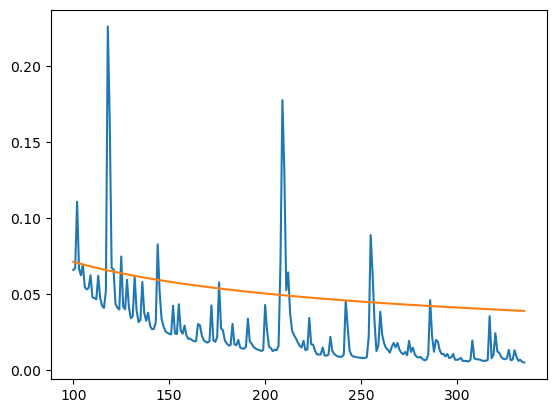

In [19]:
T = np.arange(len(residuals))
plt.plot(T[100:], residuals[100:])
plt.plot(T[100:], (residuals[0] /(np.sqrt(T)*400))[100:])
plt.show()

### Comparison of SSN and EG execution times

To compare the execution times of both methods, we will vary the dimension of the data points from 1 to 10, and compute the execution time.

In [20]:
exec_times_SSN = []
exec_times_EG = []

for d in range(1,11):
    if d==1:
        x,y, mu, nu = get_data(d = d, n_samples=n)
    else:
        x, y = get_data(d = d, n_samples=n)

    filling_points = get_filling_points(d = d, n_samples=n_samples)
    x_fill, y_fill = filling_points[:,:d], filling_points[:,d:]

    _, _, _, _, _, exec_time_SSN = SSN(x, y, filling_points, tau, nb_iter=1000, verbose=False)
    _, exec_time_EG = EG(x, y, filling_points, tau, nb_iter=1000, verbose=False)
    exec_times_SSN.append(exec_time_SSN)
    exec_times_EG.append(exec_time_EG)

c:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
c:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
c:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
c:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
c:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
c:\Users\charl\anaconda3\

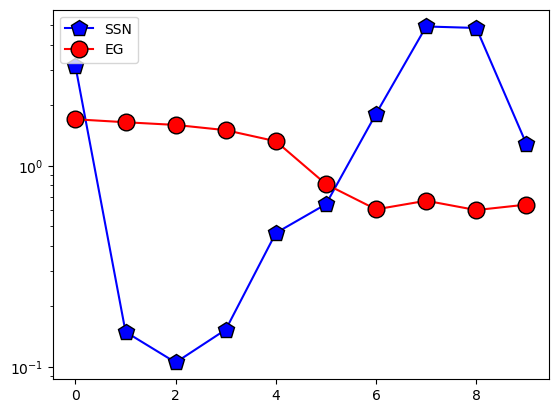

In [21]:
plt.plot(exec_times_SSN, marker = "p", color = "blue", markersize=12, markeredgecolor="k", label = "SSN")
plt.plot(exec_times_EG, marker = "o", color = "red", markersize=12, markeredgecolor="k", label = "EG")

plt.legend()
plt.yscale("log")
plt.show()

We can now obtain the Wasserstein distance estimator for both methods

In [22]:
x,y, mu, nu = get_data(d=1, n_samples=n_samples)
filling_points = get_filling_points(d=1, n_samples=n_samples)

w, q2, w_mu_hat, w_nu_hat, residuals, exec_time_SSN = SSN(x, y, filling_points, tau, nb_iter=10000)
v, exec_time_EG = EG(x, y, filling_points, tau, nb_iter=10000)

c:\Users\charl\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


Norm at iteration 1 : 285.1371
Norm at iteration 11 : 3.3477292
Norm at iteration 21 : 0.89563316
Norm at iteration 31 : 0.2223846
Norm at iteration 41 : 0.39989018
Norm at iteration 51 : 0.17701319
Norm at iteration 61 : 0.24597722
Norm at iteration 71 : 0.13342115
Norm at iteration 81 : 0.20561346
Norm at iteration 91 : 0.108565055
Norm at iteration 101 : 0.10862228
Norm at iteration 111 : 0.09614268
Norm at iteration 121 : 0.08149175
Norm at iteration 131 : 0.06714382
Norm at iteration 141 : 0.05843069
Norm at iteration 151 : 0.061702907
Norm at iteration 161 : 0.04627314
Norm at iteration 171 : 0.06959003
Norm at iteration 181 : 0.033873536
Norm at iteration 191 : 0.045172125
Norm at iteration 201 : 0.02554205
Norm at iteration 211 : 0.022948995
Norm at iteration 221 : 0.0228598
Norm at iteration 231 : 0.019387797
Norm at iteration 241 : 0.017098574
Norm at iteration 251 : 0.01557671
Norm at iteration 261 : 0.022489898
Norm at iteration 271 : 0.06293415
Norm at iteration 281 : 0.01

In [23]:
gamma_SSN, X_SSN = w
OT_hat_SSN = q2/(2*lambda2) - 1/(2*lambda2) * jnp.sum(gamma_SSN * (w_mu_hat + w_nu_hat))

gamma_EG, X_EG = v
OT_hat_EG = q2/(2*lambda2) - 1/(2*lambda2) * jnp.sum(gamma_EG * (w_mu_hat + w_nu_hat))

In [24]:
import ott
from ott.geometry import pointcloud
from ott.problems.linear import linear_problem
from ott.solvers.linear import sinkhorn

In [25]:
geom = pointcloud.PointCloud(x, y)
prob = linear_problem.LinearProblem(geom)
solver = sinkhorn.Sinkhorn()
out = solver(prob)

In [26]:
print(OT_hat_SSN)
print(OT_hat_EG)
print(out.reg_ot_cost)

-6.4067736
-6.464632
0.011515081


As you can see, the estimator for the Wasserstein distance is negative, which should not be possible. We can also see that the code malfunctions when retrieving the eigenvalues from $\sum_i \hat{\gamma}_i \Phi_i \Phi_i^T + \lambda_1 I$, because some of these are negative, when they should all be positive at all time.